In [2]:
# Find the frequency response of the simplest low pass filter
#y[n]=x[n]+x[n-1]  n=1,2,......,N
#using simulated sine wave analysis

In [3]:
import numpy as np
def mod2pi(phaseout):
    y = phaseout
    twopi = 2 * np.pi
    while (y>=np.pi):
        y = y - twopi
    while (y<-np.pi):
        y = y + twopi   
    return y

In [9]:
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt
import math as mt
B = [1,1]
A = 1

N = 10

fs = 1
T = (1/fs)
fmax = fs / 2
df = fmax / (N-1)

f = np.arange(0,fmax,df)
tmax = round(1/df)

t = np.arange(0,tmax,T)

gain = []
phases = []
a = 1
phase = 0
for fk in f:
    s = a*np.cos(2*np.pi*fk*t+phase)
    y = signal.lfilter(B,A,s)
    yss = y[1:]  #since we want to filter out the transient period
    ampout = max(yss)
    for j in range(len(yss)):
        if yss[j]==ampout:
            peakloc = j
    gain.append(ampout/a)
    sphase = 2 * np.pi * fk * ( peakloc + 1)
    phaseout = mt.acos( yss[peakloc] / ampout) - sphase
    phaseout = mod2pi(phaseout)
    phases.append(phaseout - phase)




 

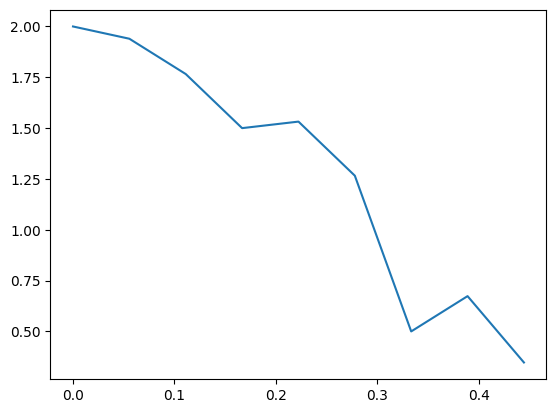

In [6]:
plt.plot(f,gain)

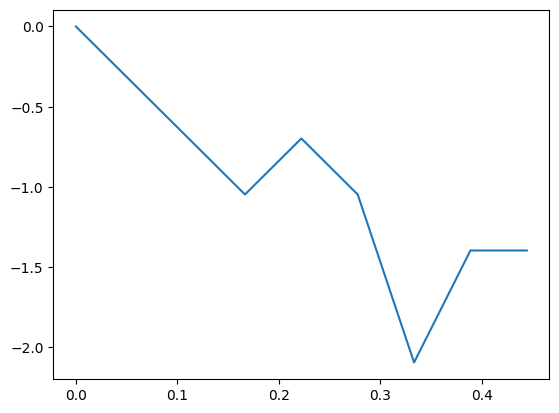

In [10]:
plt.plot(f,phases)